Коефіцієнти: a0 = 5.359734513274339, a1 = 1.5469026548672558, a2 = -1.018584070796463
Коефіцієнт детермінації R^2 = 0.3521152480926013


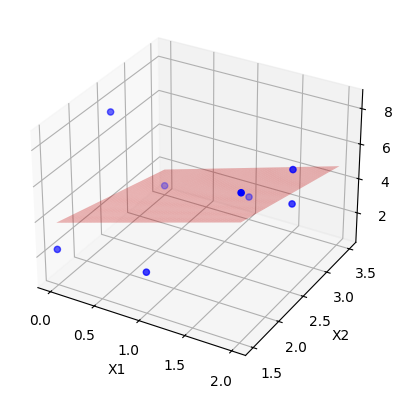

Прогноз для x1 = 1.5, x2 = 3: y = 4.6243362831858335


In [1]:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.array([0, 0, 0, 1, 1, 2, 2, 2])
x2 = np.array([1.5, 2.5, 3.5, 1.5, 3.5, 1.5, 2.5, 2.5])
y = np.array([2.3, 7.6, 0.8, 2.6, 1.6, 8.5, 5.3, 7.2])

X = np.c_[np.ones(x1.shape[0]), x1, x2]

# Рішення системи рівнянь X * a = y
a = np.linalg.inv(X.T @ X) @ X.T @ y

a0, a1, a2 = a
print(f'Коефіцієнти: a0 = {a0}, a1 = {a1}, a2 = {a2}')

# Передбачене значення y для кожного x1, x2
y_pred = X @ a

# Обчислення R^2
y_mean = np.mean(y)
ss_total = np.sum((y - y_mean) ** 2)
ss_residual = np.sum((y - y_pred) ** 2)
r2 = 1 - (ss_residual / ss_total)
print(f'Коефіцієнт детермінації R^2 = {r2}')

# Побудова графіка
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y, color='b', label='Дані')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

# Побудова поверхні для передбачень
X1_grid, X2_grid = np.meshgrid(np.linspace(min(x1), max(x1), 100),
                               np.linspace(min(x2), max(x2), 100))
Y_grid = a0 + a1 * X1_grid + a2 * X2_grid
ax.plot_surface(X1_grid, X2_grid, Y_grid, color='r', alpha=0.3)
git init

plt.show()

x1_new, x2_new = 1.5, 3
y_new = a0 + a1 * x1_new + a2 * x2_new
print(f'Прогноз для x1 = {x1_new}, x2 = {x2_new}: y = {y_new}')
